In [6]:
import pandas as pd

# CSV 파일 불러오기
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# 데이터 확인
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
plt.rc('font', family='AppleGothic')  # Mac 사용자의 경우

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


In [8]:
print("\n 데이터 정보:")
print(train.info())


 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [10]:
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [12]:
print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [14]:
print(train.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [16]:
# 대출 승인과 거절 그룹별 대출 금액의 평균
train.groupby('Loan_Status')['LoanAmount'].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

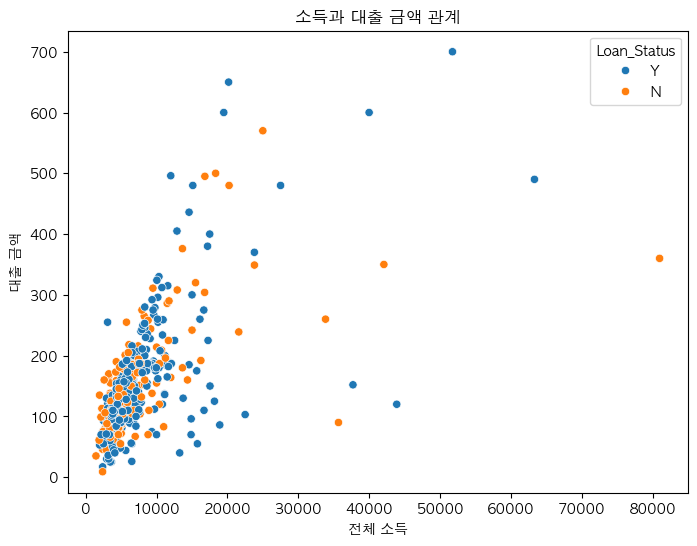

In [26]:
# 소득과 대출 금액의 관계 확인하기
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# 소득과 대출 금액의 관계 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train['TotalIncome'], y=train['LoanAmount'], hue=train['Loan_Status'])
plt.xlabel("전체 소득")
plt.ylabel("대출 금액")
plt.title("소득과 대출 금액 관계")
plt.show()

In [28]:
# 신용 기록이 있는 사람 vs 없는 사람의 대출 승인율
train.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)


Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.795789
                N              0.204211
Name: proportion, dtype: float64

In [30]:
# 대출 금액이 많을수록, 대출금액이 더 큰 것으로 보아, 대출 금액으로 승인 가능성을 봐야할 것 같고, 
# 신용 이력과도 관계가 확실히 보인다는 것을 알 수 있음.

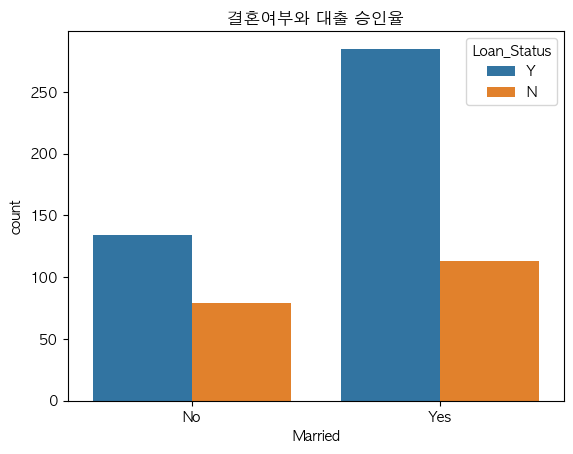

In [36]:
# 결혼여부와 대출 승인율 
sns.countplot(x="Married", hue="Loan_Status", data=train)
plt.title("결혼여부와 대출 승인율")
plt.show()

In [42]:
#결혼 한 경우에 더 대출시도를 많이 한다는 것..? 그리고 승인율도 거부율에 비해 많아 보임

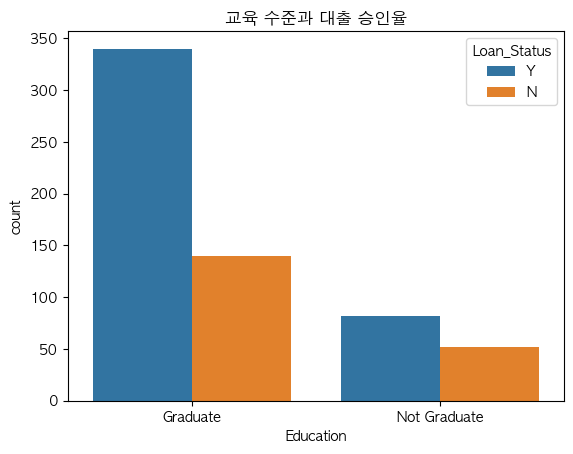

In [40]:
# 교육 수준과 대출 승인율 
sns.countplot(x="Education", hue="Loan_Status", data=train)
plt.title("교육 수준과 대출 승인율")
plt.show()


In [44]:
# 교육을 해야 학력이 있을수록 대출 승인을 더 많이 해주고, 많이 시도하는 것으로 보임.

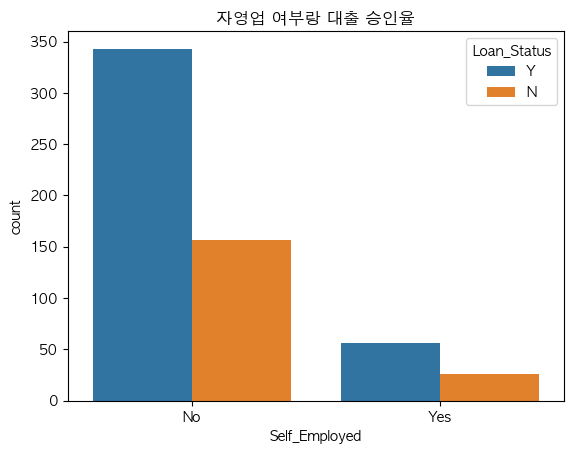

In [46]:
# 자영업 여부랑 대출 승인율
sns.countplot(x="Self_Employed", hue="Loan_Status", data=train)
plt.title("자영업 여부랑 대출 승인율")
plt.show()


In [50]:
# 자영업자가 아닌 사람들이 대출을 더 많이 함.. 
# (근데 직업은 많으니까 그거에 대한 상관성보다.. 일단 대출을 더 많이 해주는 것을 알 수 있는 것으로 볼 수 있을듯!